# 1. The Problem

The Seattle Traffic Department needs to reduce the number of road traffic accidents that occur on the city roads. Given the available data, it has been agreed that the best approach would be to be able to predict the severity of accidents that may occur due to certain conditions. It is believed that this new information will help with better planning and decision making for all stakeholders thereby reducing the risks and by extension,  reducing the possibility of the occurrence of future accidents.

Over time, the Traffic Department has established a correlation between several factors such as weather, traffic, etc and the severity of road traffic accidents. The extent of this correlation remains sketchy and this model intends to determine the extent of the these dependencies and predict how they affect the severity of car accidents.

The expected audience of this report includes but is not restricted to the following:
1. The Seattle Traffic Department
2. Seattle Police Department
3. Seattle Emergency Services
4. The Medical Board/Hospitals
5. All road users in Seattle
6. Travellers that may drive to/through Seattle enroute other destinations.

# 2. Data

The dataset labelled Data_Collissions .csv is rich. It comprises of 37 attributes (columns) and 187 observations(rows) some of which will be used to test and train the Machine Learning Model. 
Supervised Machine Learning will be applied and as such the data must be labelled and balanced for a non-biased model. Some of the attributes have missing values, some attributes may not be useful and will be dropped. 
The severity attribute uses a non-binary classifier. Two or more machine learning models may be used to get the best results.


# 3. Methodology
The data set will be imported and preprocessed while Machine Learning algorithms will be used to predict the accident severity. the stepd taken will be highlighted as the notebook progresses.


In [1]:
#Import the data manipulation libraries
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-23 09:13:43--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  44.1MB/s   in 1.6s   

2020-09-23 09:13:44 (44.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df= pd.read_csv('Data-Collisions.csv')
half_count = len(df)/2
df = df.dropna(thresh=half_count, axis=1) #Drop columns with more than 50% missing values
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,N,Overcast,Wet,Daylight,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,Raining,Wet,Dark - Street Lights On,6354039.0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,Overcast,Dry,Daylight,4323031.0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,N,Clear,Dry,Daylight,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,0,Raining,Wet,Daylight,4028032.0,10,Entering at angle,0,0,N


In [4]:
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
5                  1 -122.387598  47.690575         6  320840     322340   
6                  1 -122.338485  47.618534         7   83300      83300   
7                  2 -122.320780  47.614076         9  330897     332397   
8                  1 -122.335930  47.611904        10   63400      63400   
9                  2 -122.384700  47.528475        12   58600      58600   
10                 1         NaN        NaN        14   48900      48900   
11                 1 -122.333831  47.547371        15   

In [5]:
df.shape

(194673, 32)

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
LOCATION           object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SDOTCOLNUM        float64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [7]:
columns = list(df.columns)
for i in columns:
    print(df[i].value_counts())
    
    print("________________________")

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
________________________
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
-122.351134    212
-122.347294    190
-122.345863    163
-122.332451    160
-122.269988    152
-122.329049    147
-122.310949    146
-122.289923    142
-122.334666    138
-122.339174    136
-122.321920    136
-122.329974    135
-122.335571    133
-122.302329    132
-122.324615    131
-122.269982    130
-122.339439    129
-122.339559    129
-122.316733    128
-122.333757    128
-122.277664    128
-122.323239    126
-122.334792    125
-122.327525    121
-122.287546    121
              ... 
-122.339360      1
-122.350751      1
-122.290428      1
-122.360492      1
-122.346878      1
-122.373860      1
-122.394434      1
-122.291681      1
-122.301697      1
-122.354259      1
-122.386178      1
-122.390046      1
-122.363168      1
-122.349259      1
-122.275380      1
-122.286628      1
-122.280863      1
-122.3

In [8]:
missing_dt = df.isna()
missing_dt.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Count the missing values
for column in missing_dt.columns. values.tolist():
    print(column)
    print(missing_dt[column].value_counts())
    print(" ")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
 
X
False    189339
True       5334
Name: X, dtype: int64
 
Y
False    189339
True       5334
Name: Y, dtype: int64
 
OBJECTID
False    194673
Name: OBJECTID, dtype: int64
 
INCKEY
False    194673
Name: INCKEY, dtype: int64
 
COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64
 
REPORTNO
False    194673
Name: REPORTNO, dtype: int64
 
STATUS
False    194673
Name: STATUS, dtype: int64
 
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
 
LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64
 
SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64
 
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
 
COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
 
PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64
 
PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64
 
PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64
 
VEHCOUNT

In [10]:
#Fill missing values for location in 'X' and 'Y' with the average value for each.
avg_X = df['X'].astype(float).mean(axis=0)
print("Average of X:", avg_X)

avg_Y = df['Y'].astype(float).mean(axis=0)
print("Average of Y:", avg_Y)

df['X'].replace(np.nan, avg_X, inplace = True)
df['Y'].replace(np.nan, avg_Y, inplace=True)

Average of X: -122.33051843904114
Average of Y: 47.619542517688615


In [11]:
#Drop columns that have redundant, missing values or not enough information
drop_cols = ['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','SEVERITYCODE.1','SEVERITYDESC','PEDCOUNT',
             'INCDATE','UNDERINFL','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY']
df= df.drop(drop_cols, axis=1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,2,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,3,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,Other,3,0,3,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,N


In [12]:
#Change 'INCDTTM' to date-time for easy processing
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
ADDRTYPE                 object
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
HITPARKEDCAR             object
dtype: object

## Fill missing values and binarize

In [13]:
df['ADDRTYPE'].value_counts().idxmax()

'Block'

In [14]:
df['COLLISIONTYPE'].value_counts().idxmax()

'Parked Car'

In [15]:
df['WEATHER'].value_counts().idxmax()

'Clear'

In [16]:
df['ROADCOND'].value_counts().idxmax()

'Dry'

In [17]:
df['LIGHTCOND'].value_counts().idxmax()

'Daylight'

In [18]:
#Replace values
df['ADDRTYPE'].replace(np.nan, "Block", inplace=True)
df['COLLISIONTYPE'].replace(np.nan, "Parked Car", inplace=True)
df['WEATHER'].replace(np.nan, "Clear", inplace=True)
df['ROADCOND'].replace(np.nan, "Dry", inplace=True)
df['LIGHTCOND'].replace(np.nan, "Daylight", inplace=True)

In [19]:
#Binarize 'HITPARKEDCAR'
df['HITPARKEDCAR'].replace(to_replace=['Y','N'], value = [1,0], inplace=True)
df['HITPARKEDCAR'].dtypes

dtype('int64')

In [20]:
df['Year'] = df['INCDTTM'].apply(lambda time: time.year)
df['Year'].head()

0    2013
1    2006
2    2004
3    2013
4    2004
Name: Year, dtype: int64

In [21]:
df['Month'] = df['INCDTTM'].apply(lambda time: time.month)
df['Day of Week'] = df['INCDTTM'].apply(lambda time: time.dayofweek)

In [22]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,Year,Month,Day of Week
0,2,-122.323148,47.703140,Intersection,Angles,2,0,2,2013-03-27 14:54:00,Overcast,Wet,Daylight,0,2013,3,2
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,2,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On,0,2006,12,2
2,1,-122.334540,47.607871,Block,Parked Car,4,0,3,2004-11-18 10:20:00,Overcast,Dry,Daylight,0,2004,11,3
3,1,-122.334803,47.604803,Block,Other,3,0,3,2013-03-29 09:26:00,Clear,Dry,Daylight,0,2013,3,4
4,2,-122.306426,47.545739,Intersection,Angles,2,0,2,2004-01-28 08:04:00,Raining,Wet,Daylight,0,2004,1,2


In [23]:
df['Year'].value_counts()

2006    15188
2005    15115
2007    14456
2008    13660
2015    12995
2004    11865
2014    11841
2009    11734
2016    11659
2011    10919
2012    10907
2017    10873
2010    10808
2013    10577
2018    10419
2019     9412
2020     2245
Name: Year, dtype: int64

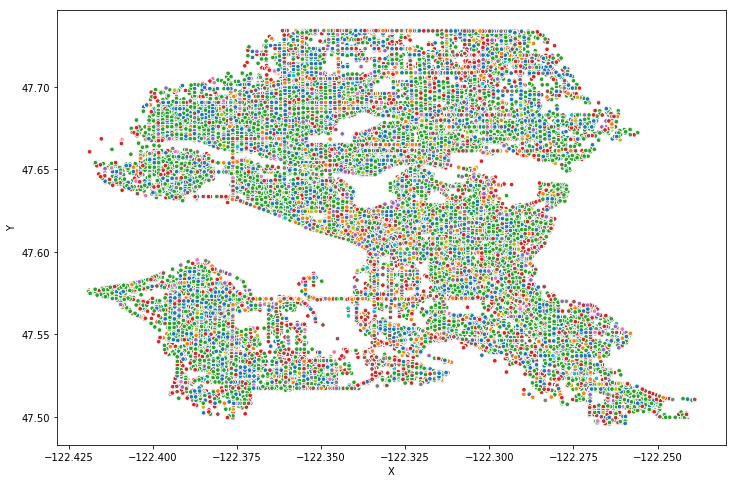

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='X', y='Y', data = df, hue ='COLLISIONTYPE', legend=False, s=20)
plt.show()

In [25]:
df.groupby(['Year'])['SEVERITYCODE'].value_counts(normalize=True)

Year  SEVERITYCODE
2004  1               0.692625
      2               0.307375
2005  1               0.705590
      2               0.294410
2006  1               0.713590
      2               0.286410
2007  1               0.722122
      2               0.277878
2008  1               0.724231
      2               0.275769
2009  1               0.712119
      2               0.287881
2010  1               0.699759
      2               0.300241
2011  1               0.716183
      2               0.283817
2012  1               0.682131
      2               0.317869
2013  1               0.688948
      2               0.311052
2014  1               0.705261
      2               0.294739
2015  1               0.711274
      2               0.288726
2016  1               0.681448
      2               0.318552
2017  1               0.685551
      2               0.314449
2018  1               0.677704
      2               0.322296
2019  1               0.674671
      2             

In [26]:
df.corr()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,Year,Month,Day of Week
SEVERITYCODE,1.000000,0.010193,0.017538,0.130949,0.214218,-0.054686,-0.101498,0.021139,0.004730,-0.015246
X,0.010193,1.000000,-0.160262,0.012739,-0.001746,-0.011979,-0.016269,0.010461,0.000199,-0.008366
Y,0.017538,-0.160262,1.000000,-0.013691,0.026209,0.016793,-0.012372,-0.025497,0.006510,-0.005537
PERSONCOUNT,0.130949,0.012739,-0.013691,1.000000,-0.038809,0.380523,-0.052766,-0.064019,-0.000646,0.058063
PEDCYLCOUNT,0.214218,-0.001746,0.026209,-0.038809,1.000000,-0.253773,-0.030187,0.034281,0.006844,-0.024964
VEHCOUNT,-0.054686,-0.011979,0.016793,0.380523,-0.253773,1.000000,0.048845,-0.102730,0.011713,0.011002
HITPARKEDCAR,-0.101498,-0.016269,-0.012372,-0.052766,-0.030187,0.048845,1.000000,0.241275,-0.000321,0.014718
Year,0.021139,0.010461,-0.025497,-0.064019,0.034281,-0.102730,0.241275,1.000000,-0.018328,-0.013850
Month,0.004730,0.000199,0.006510,-0.000646,0.006844,0.011713,-0.000321,-0.018328,1.000000,-0.000923
Day of Week,-0.015246,-0.008366,-0.005537,0.058063,-0.024964,0.011002,0.014718,-0.013850,-0.000923,1.000000


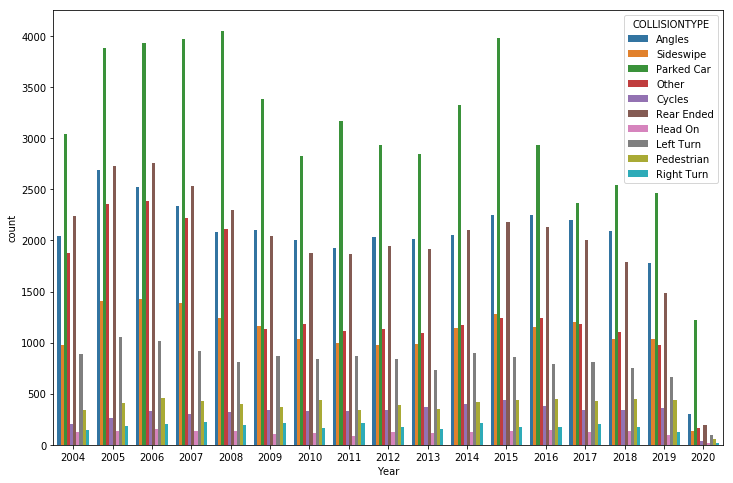

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Year', data =df, hue = 'COLLISIONTYPE')

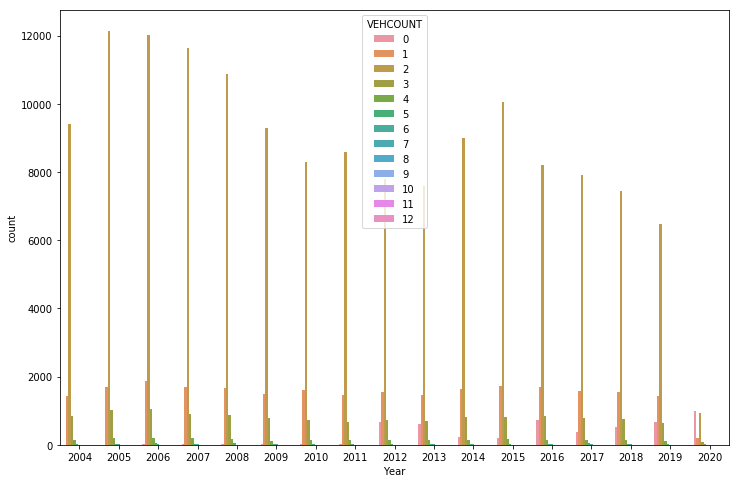

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'Year', data = df, hue='VEHCOUNT')

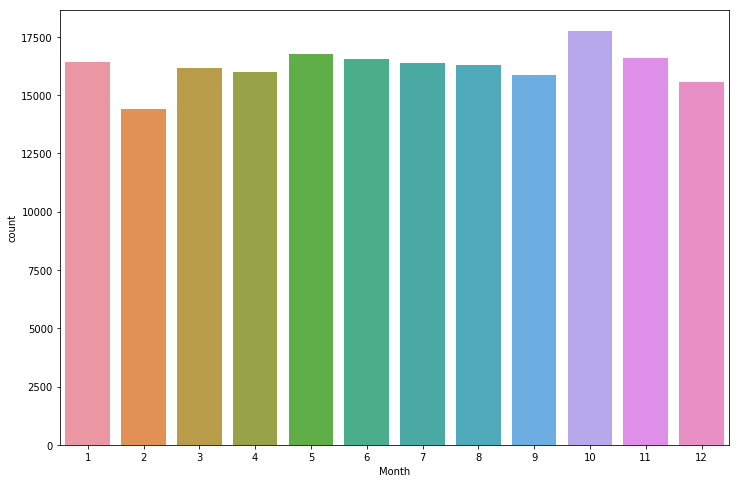

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'Month', data = df)

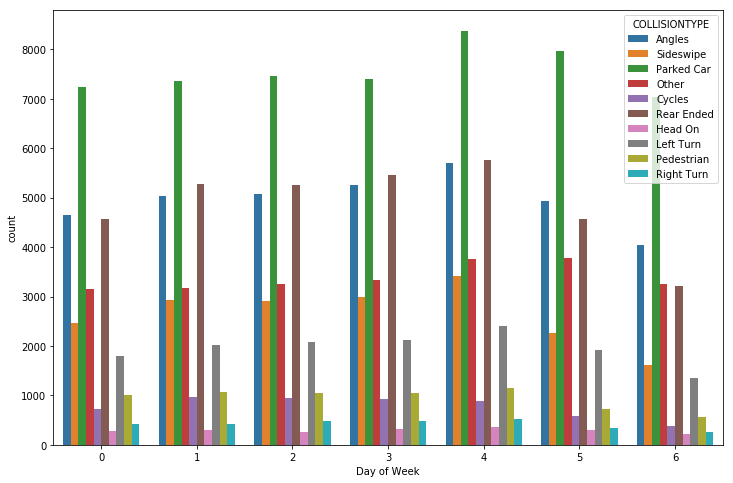

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'Day of Week', data = df, hue="COLLISIONTYPE")

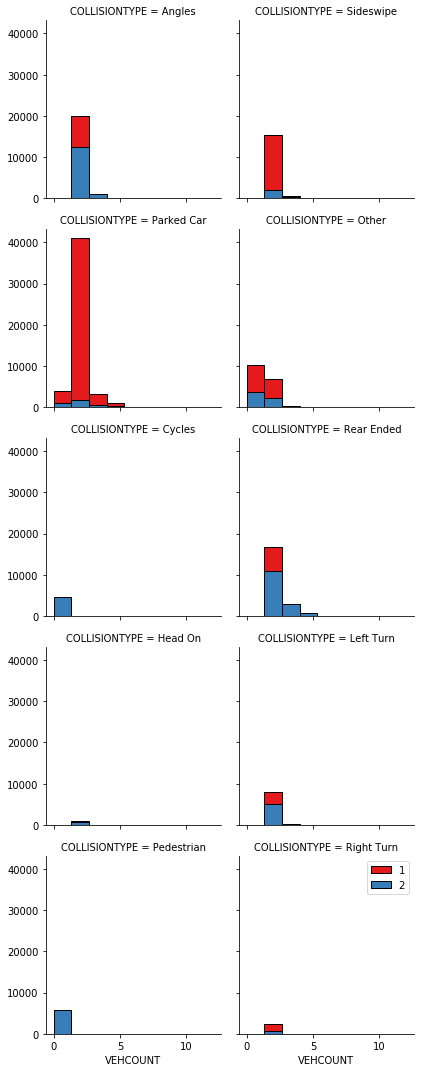

In [33]:
import seaborn as sns

bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [34]:
FEATURE = ['SEVERITYCODE','ADDRTYPE','PEDCYLCOUNT','VEHCOUNT','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','Month','Day of Week']
sevF = df[FEATURE].copy()
sevF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 10 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         194673 non-null object
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
COLLISIONTYPE    194673 non-null object
WEATHER          194673 non-null object
ROADCOND         194673 non-null object
LIGHTCOND        194673 non-null object
Month            194673 non-null int64
Day of Week      194673 non-null int64
dtypes: int64(5), object(5)
memory usage: 14.9+ MB


In [35]:
#Convert categorical data
sevF_dummy = pd.get_dummies(sevF, drop_first=True)
sevF_dummy.head()

,SEVERITYCODE,PEDCYLCOUNT,VEHCOUNT,Month,Day of Week,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,2,3,2,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,2,12,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,3,11,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,3,3,4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,2,1,2,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [36]:
sevF_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 42 columns):
SEVERITYCODE                          194673 non-null int64
PEDCYLCOUNT                           194673 non-null int64
VEHCOUNT                              194673 non-null int64
Month                                 194673 non-null int64
Day of Week                           194673 non-null int64
ADDRTYPE_Block                        194673 non-null uint8
ADDRTYPE_Intersection                 194673 non-null uint8
COLLISIONTYPE_Cycles                  194673 non-null uint8
COLLISIONTYPE_Head On                 194673 non-null uint8
COLLISIONTYPE_Left Turn               194673 non-null uint8
COLLISIONTYPE_Other                   194673 non-null uint8
COLLISIONTYPE_Parked Car              194673 non-null uint8
COLLISIONTYPE_Pedestrian              194673 non-null uint8
COLLISIONTYPE_Rear Ended              194673 non-null uint8
COLLISIONTYPE_Right Turn              194673 non-

In [37]:
from sklearn.model_selection import train_test_split

df=sevF_dummy
target = 'SEVERITYCODE'

y=df[target]
X=df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (155738, 41) (155738,)
Test set: (38935, 41) (38935,)


## Predictions using KNN, Logistic Regression and Decision Tree

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


#Using 40 classifers, fit to data, predict and determine accuracy score

knn=KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)

acc = accuracy_score (y_test, y_pred)

print('[KNN]knn.score: {:.3f}.' .format(knn.score(X_test, y_test)))
print('[KNN]accuracy_score: {:.3f}.'.format(acc))


[KNN]knn.score: 0.744.
[KNN]accuracy_score: 0.744.


In [39]:
# Store train and test accuracy information
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n_neighbor in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)

#Compute accuracy for train set and test set
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

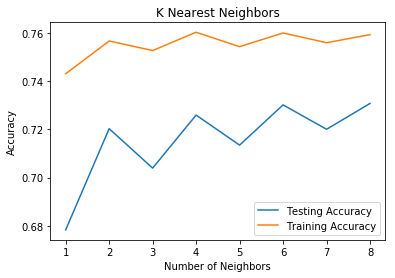

In [40]:
plt.title('K Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred =LR.predict(X_test)

acc=accuracy_score(y_test, y_pred)

print ("[Logistic regression algorithm]accuracy score: {:.3f}.".format(acc))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Logistic regression algorithm]accuracy score: 0.749.


### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, yhat))

Decision Tree's Accuracy: 0.7456016437652497


In [46]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [47]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [77]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = list(sevF_dummy.columns[1:])
features

['PEDCYLCOUNT',
 'VEHCOUNT',
 'Month',
 'Day of Week',
 'ADDRTYPE_Block',
 'ADDRTYPE_Intersection',
 'COLLISIONTYPE_Cycles',
 'COLLISIONTYPE_Head On',
 'COLLISIONTYPE_Left Turn',
 'COLLISIONTYPE_Other',
 'COLLISIONTYPE_Parked Car',
 'COLLISIONTYPE_Pedestrian',
 'COLLISIONTYPE_Rear Ended',
 'COLLISIONTYPE_Right Turn',
 'COLLISIONTYPE_Sideswipe',
 'WEATHER_Clear',
 'WEATHER_Fog/Smog/Smoke',
 'WEATHER_Other',
 'WEATHER_Overcast',
 'WEATHER_Partly Cloudy',
 'WEATHER_Raining',
 'WEATHER_Severe Crosswind',
 'WEATHER_Sleet/Hail/Freezing Rain',
 'WEATHER_Snowing',
 'WEATHER_Unknown',
 'ROADCOND_Ice',
 'ROADCOND_Oil',
 'ROADCOND_Other',
 'ROADCOND_Sand/Mud/Dirt',
 'ROADCOND_Snow/Slush',
 'ROADCOND_Standing Water',
 'ROADCOND_Unknown',
 'ROADCOND_Wet',
 'LIGHTCOND_Dark - Street Lights Off',
 'LIGHTCOND_Dark - Street Lights On',
 'LIGHTCOND_Dark - Unknown Lighting',
 'LIGHTCOND_Dawn',
 'LIGHTCOND_Daylight',
 'LIGHTCOND_Dusk',
 'LIGHTCOND_Other',
 'LIGHTCOND_Unknown']

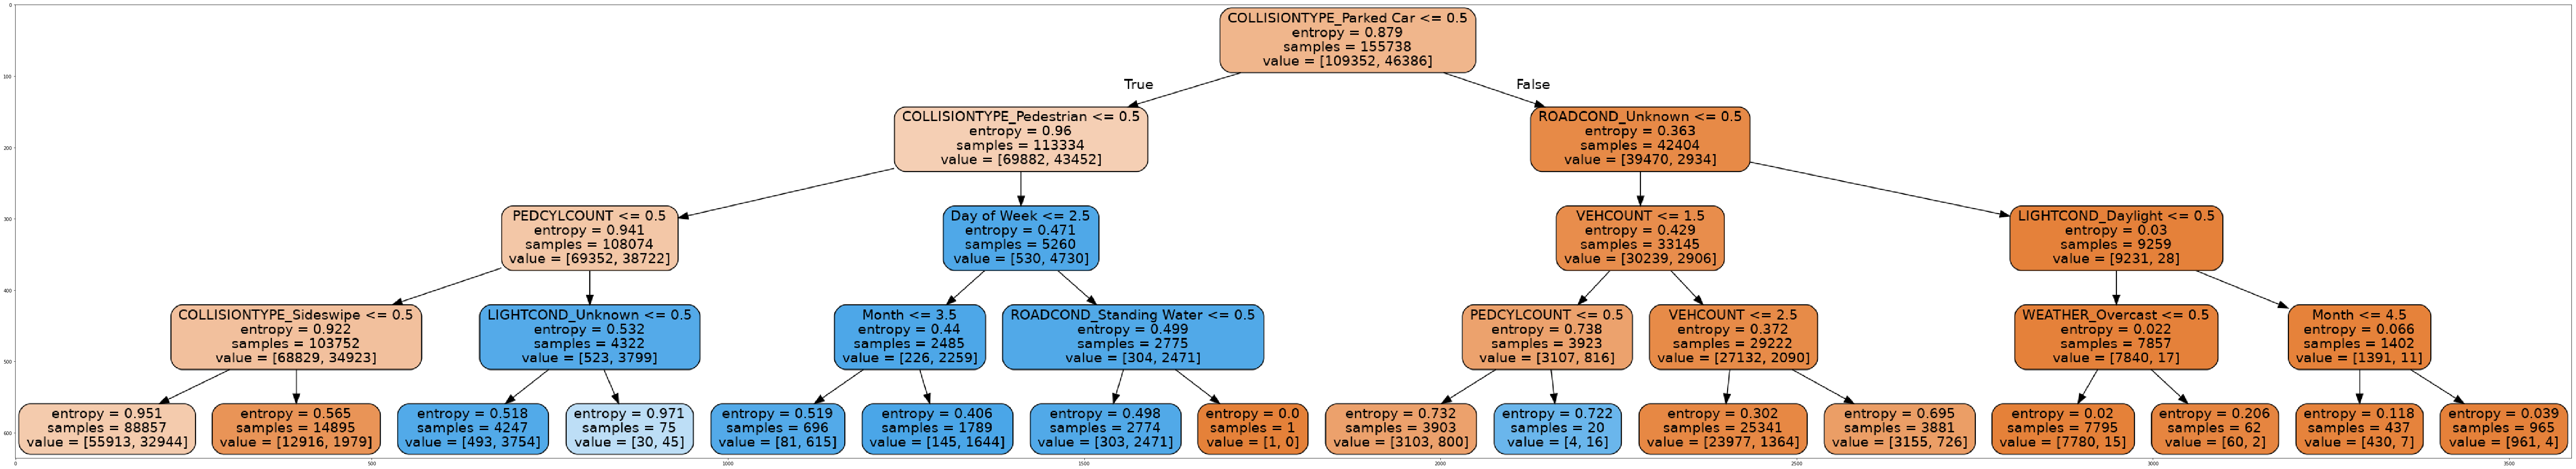

In [79]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()  
export_graphviz(DT_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img=mpimg.imread(filename) 

plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

### Report

In [81]:
import pandas as pd
data= {'Algorithm': ['KNN','LR', 'DT'],
      'Accuracy Score':['0744','0.749','0.745'],
      'Log_Loss': ['NA','NA','0.49']}
Report= pd.DataFrame(data, columns=['Algorithm','Accuracy Score','Log_Loss'])
print(Report)

  Algorithm Accuracy Score Log_Loss
0       KNN           0744       NA
1        LR          0.749       NA
2        DT          0.745     0.49
